# Anomaly Detection in Univariate Time Series with Random Forest, in the context of WISDom project: RF Implementation

### Flow Rate Data from a sensor in a Water Sypply System located in Barreiro

# 1. Introduction

## Acquiring data

Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date'], dtype='object')
Data Dimension:
Number of Records: 480
Number of Features: 4
Data Dimension:
Number of Records: 96
Number of Features: 4
Data Dimension:
Number of Records: 767
Number of Features: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       96 non-null    

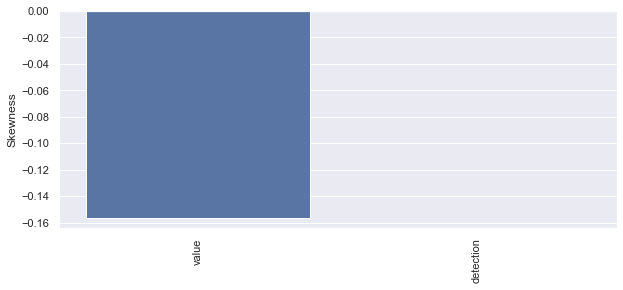

Skewness of the below features:
value       -0.104418
detection    2.038954
dtype: float64


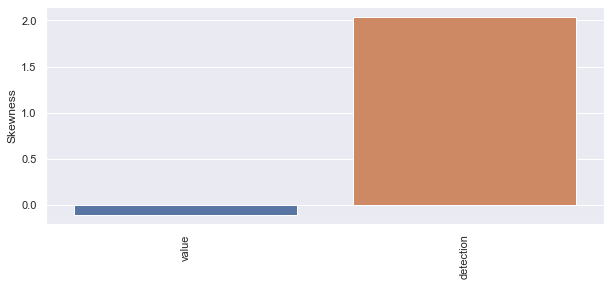

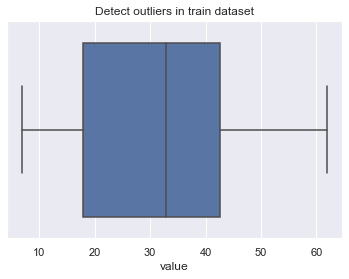

Interquartile range: 24.6293


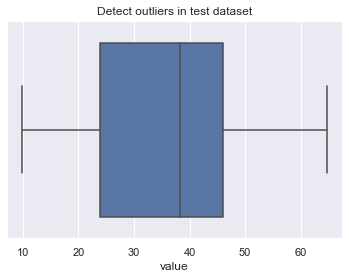

Interquartile range: 22.1598495375


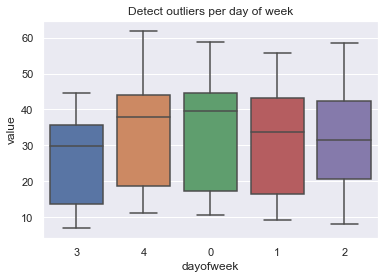

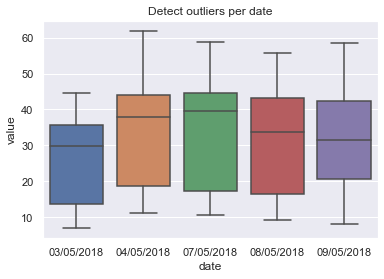

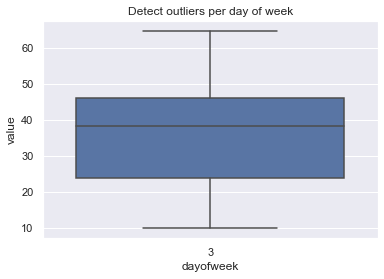

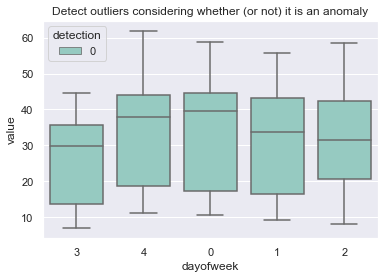

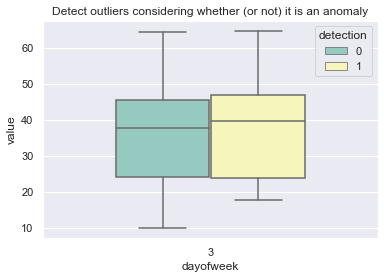

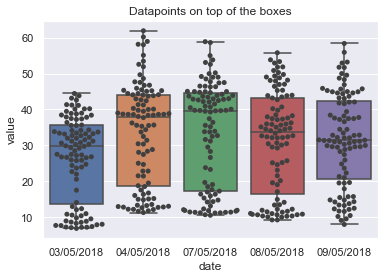

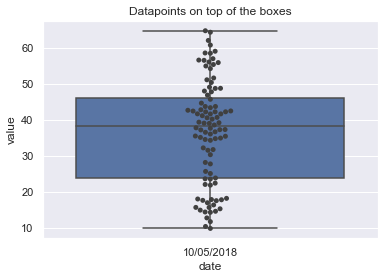

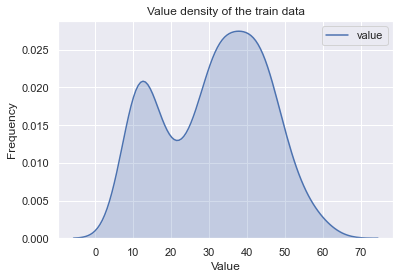

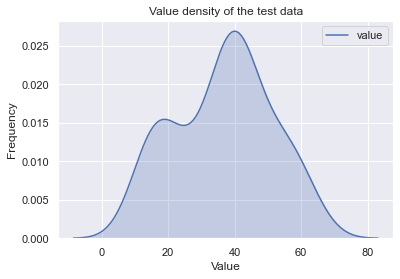

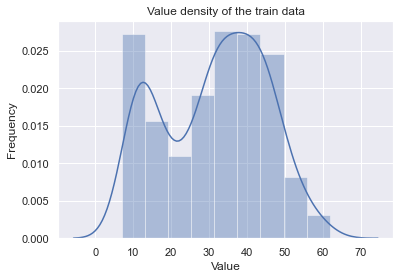

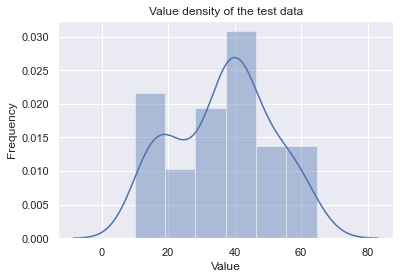

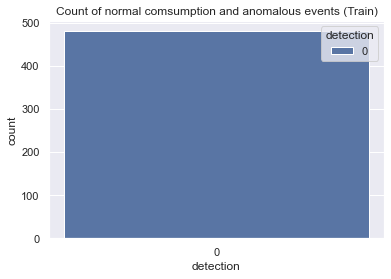

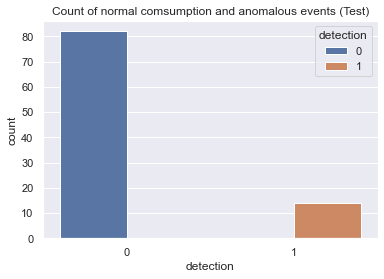

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    object 
 4   int_date   480 non-null    int32  
 5   timestamp  480 non-null    int64  
 6   dayofweek  480 non-null    int64  
 7   month      480 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 28.2+ KB


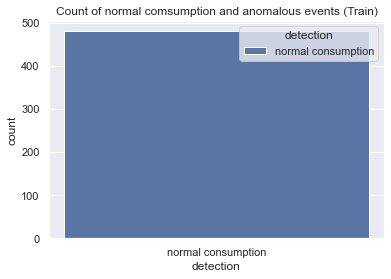

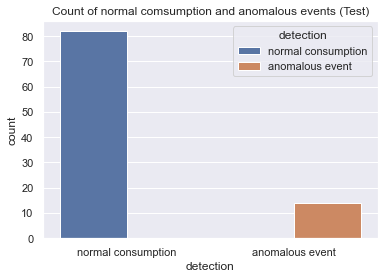

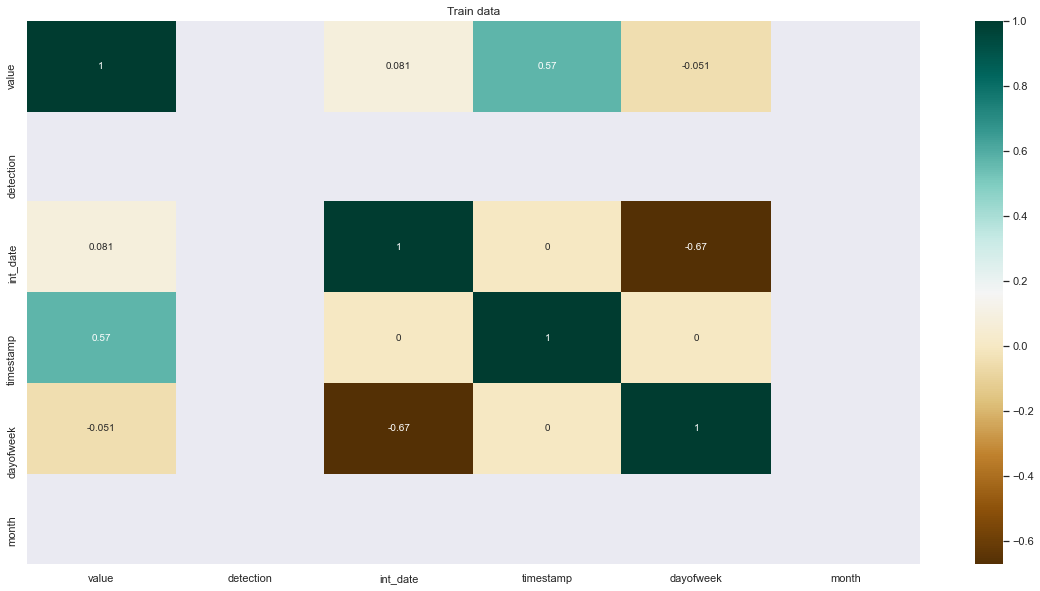

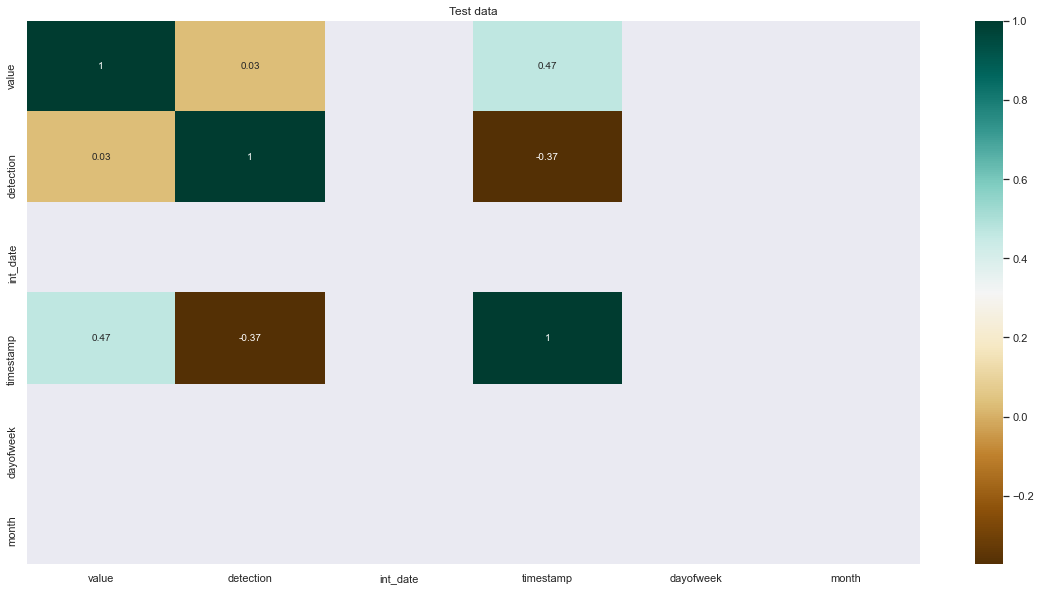

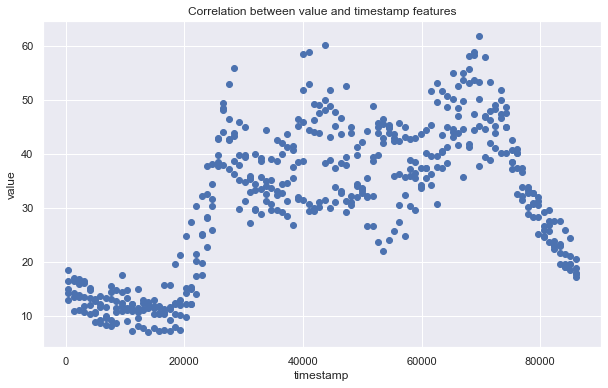

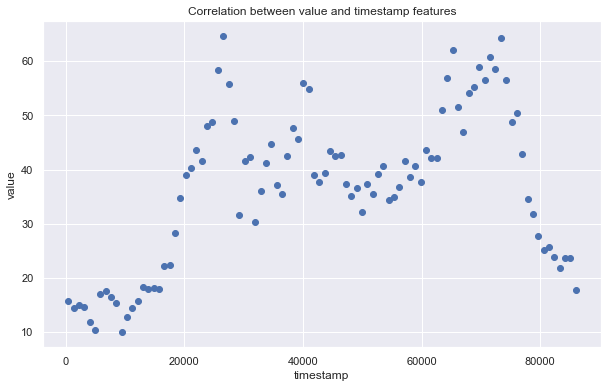

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
 4   int_date   480 non-null    int32  
 5   timestamp  480 non-null    int64  
 6   dayofweek  480 non-null    int64  
 7   month      480 non-null    int64  
 8   datetime   480 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 32.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       480 non-null    object        
 1   time       480 non-null    object        
 2   value      480 non-null    float64       
 3   detection  480 non-null    int64       

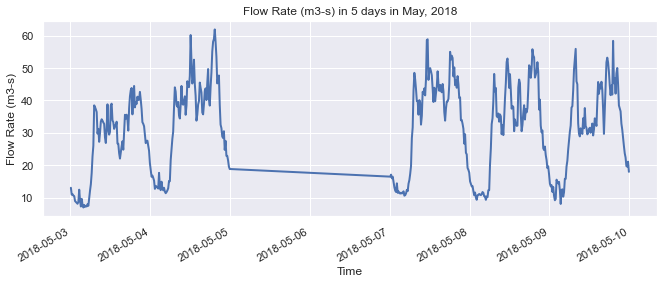

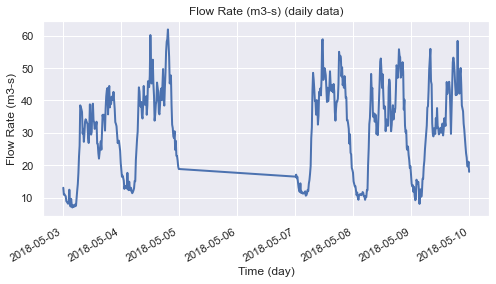

NameError: name 'dfT' is not defined

NameError: name 'dfT' is not defined

In [1]:
# To run a python script
%run TimeSeries_FinalAnalysis.ipynb

## Libraries and Packages

In [28]:
# Metrics
import sklearn.metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize  

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Lags of time series

# Random Forest algorithm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

# Regularization and feature selection
from sklearn.linear_model import LassoCV, RidgeCV

# Boosting

# XGBoost algorithm
from xgboost import XGBRegressor 

In [2]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error

## Data

### Train data

In [3]:
train

,date,time,value,detection,int_date,timestamp,dayofweek,month,datetime
0,03/05/2018,00:07:30,13.026578,0,20180503,450,3,5,2018-05-03 00:07:30
1,03/05/2018,00:22:30,10.898906,0,20180503,1350,3,5,2018-05-03 00:22:30
2,03/05/2018,00:37:30,11.048772,0,20180503,2250,3,5,2018-05-03 00:37:30
3,03/05/2018,00:52:30,10.641706,0,20180503,3150,3,5,2018-05-03 00:52:30
4,03/05/2018,01:07:30,10.452578,0,20180503,4050,3,5,2018-05-03 01:07:30
...,...,...,...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509,82350,2,5,2018-05-09 22:52:30
476,09/05/2018,23:07:30,19.707922,0,20180509,83250,2,5,2018-05-09 23:07:30
477,09/05/2018,23:22:30,19.546844,0,20180509,84150,2,5,2018-05-09 23:22:30
478,09/05/2018,23:37:30,21.068406,0,20180509,85050,2,5,2018-05-09 23:37:30


### Test data

In [4]:
test

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,10/05/2018,00:07:30,15.713694,0,20180510,450,3,5
1,10/05/2018,00:22:30,14.460300,0,20180510,1350,3,5
2,10/05/2018,00:37:30,14.975789,0,20180510,2250,3,5
3,10/05/2018,00:52:30,14.658967,0,20180510,3150,3,5
4,10/05/2018,01:07:30,11.786478,0,20180510,4050,3,5
5,10/05/2018,01:22:30,10.446106,0,20180510,4950,3,5
6,10/05/2018,01:37:30,17.025783,0,20180510,5850,3,5
7,10/05/2018,01:52:30,17.597394,0,20180510,6750,3,5
8,10/05/2018,02:07:30,16.407461,0,20180510,7650,3,5
9,10/05/2018,02:22:30,15.341344,0,20180510,8550,3,5


# 2. Data Transformation

## Datasets for Algorithm Implementation

### Train

In [5]:
df_train = pd.concat([train['dayofweek'],train['timestamp'],train['value'],train['detection']], axis=1, join='inner')
df_train.head(10)

,dayofweek,timestamp,value,detection
0,3,450,13.026578,0
1,3,1350,10.898906,0
2,3,2250,11.048772,0
3,3,3150,10.641706,0
4,3,4050,10.452578,0
5,3,4950,8.923089,0
6,3,5850,8.638289,0
7,3,6750,8.334467,0
8,3,7650,8.100783,0
9,3,8550,8.706250,0


### Test

In [6]:
df_test = pd.concat([test['dayofweek'],test['timestamp'],test['value'],test['detection']], axis=1, join='inner')
df_test.head(10)

,dayofweek,timestamp,value,detection
0,3,450,15.713694,0
1,3,1350,14.460300,0
2,3,2250,14.975789,0
3,3,3150,14.658967,0
4,3,4050,11.786478,0
5,3,4950,10.446106,0
6,3,5850,17.025783,0
7,3,6750,17.597394,0
8,3,7650,16.407461,0
9,3,8550,15.341344,0


## Some Graphics

In [7]:
def plot_rgr_dist(X,y):
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
    plt.ylabel('Values')
    plt.xlabel('Time')
    
    main_ax.plot(X, y, 'ok', markersize=3, alpha=0.2)

    y_hist.hist(y, 40, histtype='stepfilled',
                orientation='horizontal', color='gray')
    y_hist.invert_xaxis()

#### Train

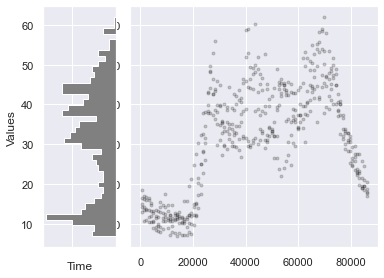

In [8]:
plot_rgr_dist(df_train['timestamp'],df_train['value'])

#### Test

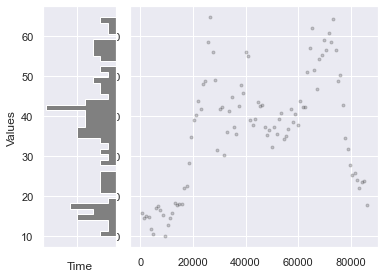

In [9]:
plot_rgr_dist(df_test['timestamp'],df_test['value'])

## Implementation sets

In [10]:
X_train = []
y_train = []

X_test = []
y_test = []

time = min(df_train['timestamp'].values)
hour = 1
hour = 3600*hour
day = 24*60*60
m = 4 # número de amostras -> tamanho da amostra

for i in range(int(day/hour)*m):
    X_train.append(df_train[(df_train['timestamp']>=time)&(df_train['timestamp']<time+hour)]['timestamp'].values)
    y_train.append(df_train[(df_train['timestamp']>=time)&(df_train['timestamp']<time+hour)]['value'].values)
    
    X_test.append(df_test[(df_test['timestamp']>=time)&(df_test['timestamp']<time+hour)]['timestamp'].values)
    y_test.append(df_test[(df_test['timestamp']>=time)&(df_test['timestamp']<time+hour)]['value'].values)
    
    time += hour/m

In [11]:
X_train

[array([ 450, 1350, 2250, 3150,  450, 1350, 2250, 3150,  450, 1350, 2250,
        3150,  450, 1350, 2250, 3150,  450, 1350, 2250, 3150], dtype=int64),
 array([1350, 2250, 3150, 4050, 1350, 2250, 3150, 4050, 1350, 2250, 3150,
        4050, 1350, 2250, 3150, 4050, 1350, 2250, 3150, 4050], dtype=int64),
 array([2250, 3150, 4050, 4950, 2250, 3150, 4050, 4950, 2250, 3150, 4050,
        4950, 2250, 3150, 4050, 4950, 2250, 3150, 4050, 4950], dtype=int64),
 array([3150, 4050, 4950, 5850, 3150, 4050, 4950, 5850, 3150, 4050, 4950,
        5850, 3150, 4050, 4950, 5850, 3150, 4050, 4950, 5850], dtype=int64),
 array([4050, 4950, 5850, 6750, 4050, 4950, 5850, 6750, 4050, 4950, 5850,
        6750, 4050, 4950, 5850, 6750, 4050, 4950, 5850, 6750], dtype=int64),
 array([4950, 5850, 6750, 7650, 4950, 5850, 6750, 7650, 4950, 5850, 6750,
        7650, 4950, 5850, 6750, 7650, 4950, 5850, 6750, 7650], dtype=int64),
 array([5850, 6750, 7650, 8550, 5850, 6750, 7650, 8550, 5850, 6750, 7650,
        8550, 5850, 

In [12]:
y_train

[array([13.02657778, 10.89890556, 11.04877222, 10.64170556, 18.58848333,
        16.41657778, 16.79506481, 16.10637778, 16.46732222, 17.07696667,
        15.95869444, 16.45268889, 15.00851389, 14.20419815, 13.4475    ,
        13.53943889, 14.29011111, 13.44530556, 13.83475556, 11.76570556]),
 array([10.89890556, 11.04877222, 10.64170556, 10.45257778, 16.41657778,
        16.79506481, 16.10637778, 15.254     , 17.07696667, 15.95869444,
        16.45268889, 14.82525556, 14.20419815, 13.4475    , 13.53943889,
        12.00158889, 13.44530556, 13.83475556, 11.76570556, 13.30248333]),
 array([11.04877222, 10.64170556, 10.45257778,  8.92308889, 16.79506481,
        16.10637778, 15.254     , 12.69050556, 15.95869444, 16.45268889,
        14.82525556, 13.19035   , 13.4475    , 13.53943889, 12.00158889,
        10.72075   , 13.83475556, 11.76570556, 13.30248333, 10.52238333]),
 array([10.64170556, 10.45257778,  8.92308889,  8.63828889, 16.10637778,
        15.254     , 12.69050556, 13.60799444

In [13]:
X_test

[array([ 450, 1350, 2250, 3150], dtype=int64),
 array([1350, 2250, 3150, 4050], dtype=int64),
 array([2250, 3150, 4050, 4950], dtype=int64),
 array([3150, 4050, 4950, 5850], dtype=int64),
 array([4050, 4950, 5850, 6750], dtype=int64),
 array([4950, 5850, 6750, 7650], dtype=int64),
 array([5850, 6750, 7650, 8550], dtype=int64),
 array([6750, 7650, 8550, 9450], dtype=int64),
 array([ 7650,  8550,  9450, 10350], dtype=int64),
 array([ 8550,  9450, 10350, 11250], dtype=int64),
 array([ 9450, 10350, 11250, 12150], dtype=int64),
 array([10350, 11250, 12150, 13050], dtype=int64),
 array([11250, 12150, 13050, 13950], dtype=int64),
 array([12150, 13050, 13950, 14850], dtype=int64),
 array([13050, 13950, 14850, 15750], dtype=int64),
 array([13950, 14850, 15750, 16650], dtype=int64),
 array([14850, 15750, 16650, 17550], dtype=int64),
 array([15750, 16650, 17550, 18450], dtype=int64),
 array([16650, 17550, 18450, 19350], dtype=int64),
 array([17550, 18450, 19350, 20250], dtype=int64),
 array([1845

In [14]:
y_test

[array([15.71369444, 14.4603    , 14.97578889, 14.65896667]),
 array([14.4603    , 14.97578889, 14.65896667, 11.78647778]),
 array([14.97578889, 14.65896667, 11.78647778, 10.44610556]),
 array([14.65896667, 11.78647778, 10.44610556, 17.02578333]),
 array([11.78647778, 10.44610556, 17.02578333, 17.59739444]),
 array([10.44610556, 17.02578333, 17.59739444, 16.40746111]),
 array([17.02578333, 17.59739444, 16.40746111, 15.34134444]),
 array([17.59739444, 16.40746111, 15.34134444,  9.90585556]),
 array([16.40746111, 15.34134444,  9.90585556, 12.81604444]),
 array([15.34134444,  9.90585556, 12.81604444, 14.36903889]),
 array([ 9.90585556, 12.81604444, 14.36903889, 15.73085   ]),
 array([12.81604444, 14.36903889, 15.73085   , 18.23646111]),
 array([14.36903889, 15.73085   , 18.23646111, 17.84421667]),
 array([15.73085   , 18.23646111, 17.84421667, 18.06169444]),
 array([18.23646111, 17.84421667, 18.06169444, 17.91016667]),
 array([17.84421667, 18.06169444, 17.91016667, 22.09259259]),
 array([

# 3. Algorithm Implementation

## Code 1

In [17]:
X = X_train.copy() # time
y = y_train.copy() # values

Random Forest Test MSE: 0.361


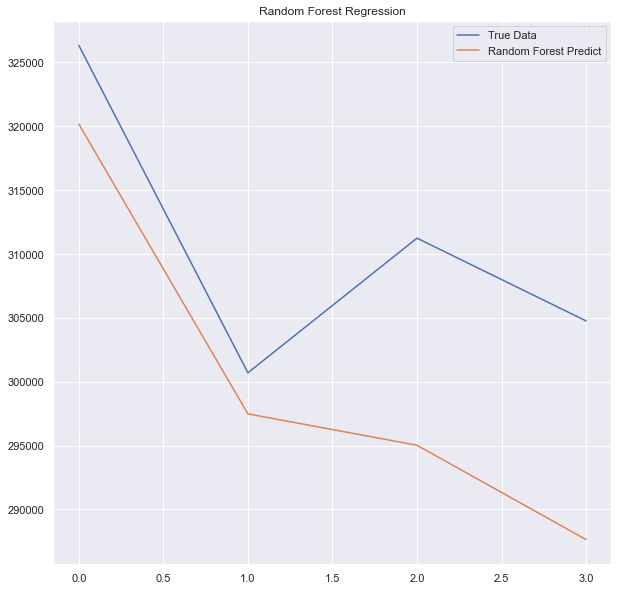

In [29]:
rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

rf.fit(np.array(X[i]).reshape(-1,1), np.array(y[i]))
predictions = clf.predict(np.array(X_test[i]).reshape(-1,1))

error = mean_squared_error(np.array(y_test[i]), predictions)
print('Random Forest Test MSE: %.3f' % error)

y = (np.array(y_test[i])) * 20450.83322 + 4975.270898
p = predictions * 20450.83322 + 4975.270898

plt.plot(y, label='True Data')
plt.plot(p, label='Random Forest Predict')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

## Code 2

In [25]:
# Creating a copy of the initial dataframe to make various transformations 
data = pd.DataFrame(df.value.copy())
data.columns = ["y"]

In [26]:
data

,y
datetime,
2018-05-03 00:07:30,13.026578
2018-05-03 00:22:30,10.898906
2018-05-03 00:37:30,11.048772
2018-05-03 00:52:30,10.641706
2018-05-03 01:07:30,10.452578
...,...
2018-05-09 22:52:30,22.357783
2018-05-09 23:07:30,19.707922
2018-05-09 23:22:30,19.546844


In [29]:
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [30]:
tscv

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [31]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [32]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [33]:
# machine learning in two lines
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

ValueError: at least one array or dtype is required

In [ ]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [ ]:
plotModelResults(rf, plot_intervals=True)
plotCoefficients(rf)

## Code 3

>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.0
MAE: 0.000


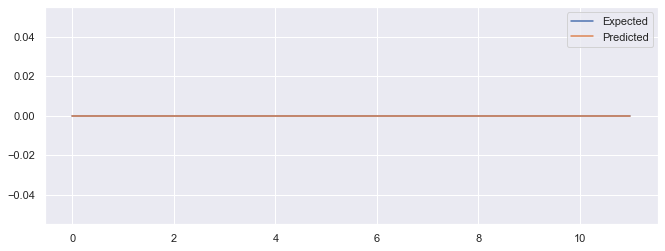

In [34]:
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions
 
# load the dataset
series = pd.concat([train['dayofweek'],train['timestamp'],train['value'],train['detection']], axis=1, join='inner')
# read_csv('daily-total-female-births.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [36]:
# finalize model and make a prediction for monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# load the dataset
series = train[['datetime','value']]
values = series.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = values[-6:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

<ipython-input-36-f1c0429bde5f>:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  series = train[['datetime','value']]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# 4. Results 

In [ ]:
#plot RF as trees increase
#set starting point for subplots
index = 1#set the size of the subplot to something large
plt.figure(figsize=(20,20))#iterate through number of trees in model
#and plot predictions v actual
for i in [1,5,10,100]:
    plt.subplot(2, 2, index)
    RF_plot = RandomForestRegressor(n_estimators=i)
    RF_plot.fit(X,y)
    #split data btw vals RF can interploate vs. data
    #it needs to exptrapolate
    interpolate_index = X_test[:,10]<=2010
    extrapolate_index = X_test[:,10]>2010
    X_interpolate = X_test[interpolate_index]
    X_extrapolate = X_test[extrapolate_index]
    y_interpolate = y_test[interpolate_index]
    y_extrapolate = y_test[extrapolate_index]
    #plot predictions vs. actual
    plt.scatter(RFplot.predict(X_interpolate),
                y_interpolate,
                color="g",label="interpolate")
    plt.scatter(RFplot.predict(X_extrapolate),
                y_extrapolate,
                color="b",label="extrapolate")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest with {} trees'.format(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)
    plt.legend(loc="best")
    index += 1